This cell will import all of the necessary libraries for this lab. These 
include the pyserial library which is used to communicate with the
microcontroller, NumPy which is used to load data from a CSV file, and
pyplot from matplotlib which is a plotting package with almost identical
commands to MATLAB. Run this cell first.

In [2]:
from serial import Serial
import time
import numpy as np
from matplotlib import pyplot as plt

This cell defines a function which will plot the step response. No need to
modify this cell.

In [3]:
def plot_step(kp, ki, kd, step_pos, filename):
    # Import the data from the file
    data = np.genfromtxt(filename, delimiter=',')
    times = data[:,0]
    positions = data[:,1]
    percents = data[:,2]
    p_percents = data[:,3]
    i_percents = data[:,4]
    d_percents = data[:,5]

    # print(get_stats(times, positions, step_pos))

    # Make a figure and set the size to 6x6 in
    plt.rcParams['figure.figsize'] = (8, 12)
    plt.figure()

    # Plot the step response of position vs time on the top half
    plt.subplot(211)
    # plt.figure()
    plt.plot(times, positions)
    plt.hlines(step_pos, times[1], times[-1], colors='k', linestyles='dashed')
    plt.xlabel("Time [s]")
    plt.ylabel("Postion [rad]")
    plt.title(f'Step Response: K_P = {kp}, K_I = {ki}, K_D = {kd}')

    # Plot the proportional and integral components on the bottom half
    plt.subplot(212)
    plt.plot(times, p_percents, '--')
    plt.plot(times, i_percents, '--')
    plt.plot(times, d_percents, '--')
    plt.plot(times, percents)
    plt.ylim(-110, 110)
    plt.xlabel("Time [s]")
    plt.ylabel("Voltage percent")
    plt.title("Controller Output")
    plt.legend(['P Part', 'I Part', 'D Part', 'Total'])
    plt.tight_layout()
    plt.show()

This cell defines a function which will connect to the microcontroller over
the serial port. It will send the desired gains, velocity setpoint to step to,
and total time to run the test for, as specified in the variables. Then it will
collect the data and write it to `filename`. Finally it will plot the step
response using the previous function.
No need to modify this cell.

In [4]:
def run_step(kp, ki, kd, step_pos, t_step, filename, out_max=100):
    # Uncomment this line and give the name of the serial port which the Nucleo
    # is connected to, as a string. This should be something like
    # 'COMx' for Windows and
    # '/dev/tty.usbmodemXXXX' for Mac/Linux
    # Windows: Open Device Manager and look under "Ports (COM & LPT)" for a 
    # "USB Serial Device"
    # Mac/Linux: Open terminal and run "ls /dev/tty.*" to find the port matching the
    # format above.
    serport = 'COM6'
    
    # Open the serial port, and give it the name ser.
    with Serial(serport, baudrate=115200, timeout=5) as ser:
        # Restart the microcontroller
        ser.write(b'\x02\x04')
        # Write the parameters to the microcontroller
        ser.write((str(kp) + '\r\n').encode())
        ser.write((str(ki) + '\r\n').encode())
        ser.write((str(kd) + '\r\n').encode())
        ser.write((str(step_pos) + '\r\n').encode())
        ser.write((str(out_max) + '\r\n').encode())
        ser.write((str(t_step) + '\r\n').encode())

        # Open the data file for writing, and give it the name datafile
        with open(filename, 'w') as f:
            while True:
                # Read the current line and decode from bytes to a string
                line = ser.readline().decode()
                # Print the line so we can see what the microcontroller is doing
                # print(line, end='')
                # If the line starts with END, then we know the data is complete
                if line[:3] == 'END':
                    break
                # If the line has a comma, it is a line of CSV data.
                elif ',' in line:
                    f.write(line.strip() + '\n')

    plot_step(kp, ki, kd, step_pos, filename)

Make several cells here to call `run_step` for each of the required gains
from the lab manual. Use a unique filename for the data files.

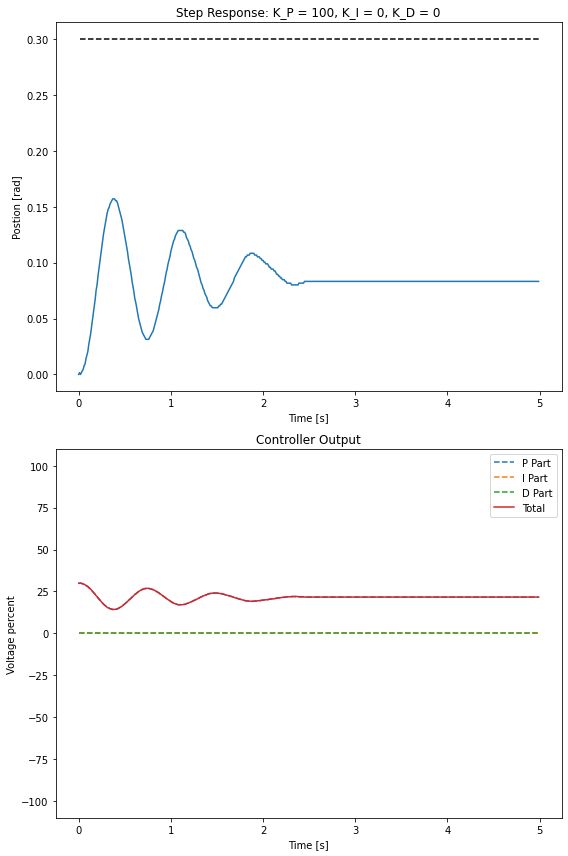

In [39]:
run_step(100, 0, 0, 0.3, 5000, "data1.csv")